<a href="https://colab.research.google.com/github/annabat02/Preprocessing_DataMining/blob/main/TugasPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
df = pd.read_csv('Stress_Level.csv')


In [73]:
X = df[['Age', 'Gender', 'Employment_Status', 'Financial_Stress', 'Work_Stress', 'Sleep_Hours', 'Social_Support_Score']]
y = df['Stress_Level']


In [9]:
print (X)

      Age  Gender Employment_Status  Financial_Stress  Work_Stress  \
0      56    Male        Unemployed                 4            3   
1      69  Female           Retired                 1            4   
2      46  Female          Employed                 8            7   
3      32  Female        Unemployed                 7            4   
4      60  Female           Retired                 8            9   
...   ...     ...               ...               ...          ...   
1195   23  Female           Student                 2            8   
1196   43  Female          Employed                 8            9   
1197   71  Female           Retired                 2            9   
1198   21    Male          Employed                 8            5   
1199   36    Male          Employed                 7            2   

      Sleep_Hours  Social_Support_Score  
0             6.0                     3  
1             8.8                     6  
2             5.3                

In [10]:
print(y)

0       9
1       6
2       8
3       4
4       3
       ..
1195    5
1196    9
1197    2
1198    2
1199    5
Name: Stress_Level, Length: 1200, dtype: int64


In [11]:
print(df.isnull().sum())

Age                     0
Gender                  0
Employment_Status       0
Financial_Stress        0
Work_Stress             0
Sleep_Hours             0
Social_Support_Score    0
Stress_Level            0
dtype: int64


mengecek apakah ada missing value, hasilnya tidak ada missing value

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
print(X)

[[56 'Male' 'Unemployed' ... 3 6.0 3]
 [69 'Female' 'Retired' ... 4 8.8 6]
 [46 'Female' 'Employed' ... 7 5.3 5]
 ...
 [71 'Female' 'Retired' ... 9 6.0 2]
 [21 'Male' 'Employed' ... 5 8.5 8]
 [36 'Male' 'Employed' ... 2 4.4 7]]


In [14]:
print(y)

[9 6 8 ... 2 2 5]


In [44]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1200 non-null   int64  
 1   Gender                1200 non-null   object 
 2   Employment_Status     1200 non-null   object 
 3   Financial_Stress      1200 non-null   int64  
 4   Work_Stress           1200 non-null   int64  
 5   Sleep_Hours           1200 non-null   float64
 6   Social_Support_Score  1200 non-null   int64  
 7   Stress_Level          1200 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 75.1+ KB


(None,
                Age  Financial_Stress  Work_Stress  Sleep_Hours  \
 count  1200.000000       1200.000000  1200.000000   1200.00000   
 mean     46.317500          4.992500     4.889167      6.46900   
 std      16.451157          2.590953     2.547016      1.52955   
 min      18.000000          1.000000     1.000000      2.00000   
 25%      33.000000          3.000000     3.000000      5.40000   
 50%      46.000000          5.000000     5.000000      6.40000   
 75%      61.000000          7.000000     7.000000      7.50000   
 max      74.000000          9.000000     9.000000     12.40000   
 
        Social_Support_Score  Stress_Level  
 count           1200.000000   1200.000000  
 mean               5.055000      5.000833  
 std                2.652893      2.538281  
 min                1.000000      1.000000  
 25%                3.000000      3.000000  
 50%                5.000000      5.000000  
 75%                7.000000      7.000000  
 max                9.000000

jika missing value tidak ada maka kita harus mengecek apakah ada noisy data atau mungkin outlier

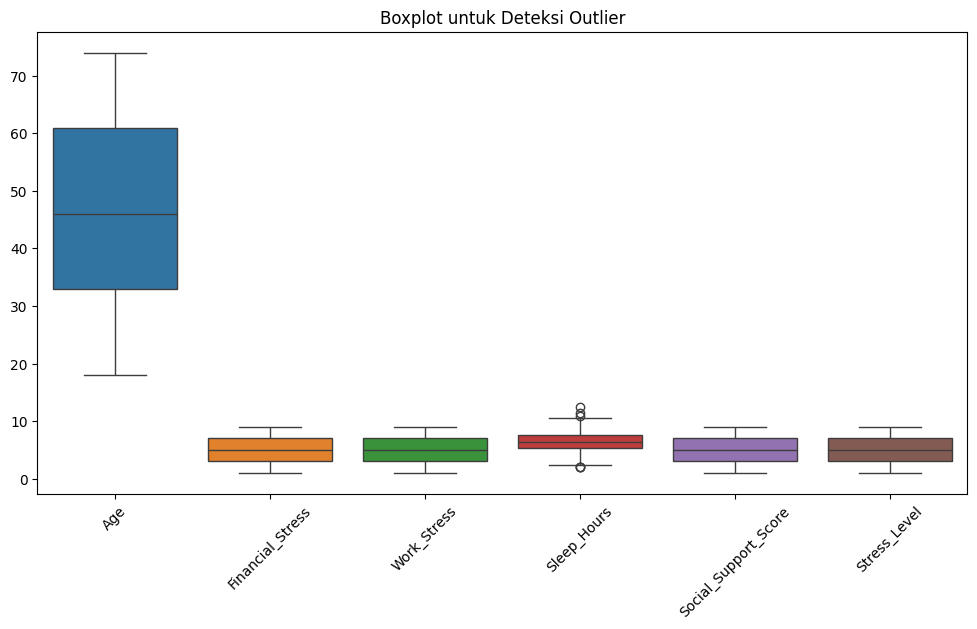

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Financial_Stress', 'Work_Stress', 'Sleep_Hours', 'Social_Support_Score', 'Stress_Level']])
plt.title("Boxplot untuk Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()

Melihat apakah ada outlier dengan menggunakan Boxplot hasilnya terdaoat oulier di Sleeo_Hours

In [51]:
Q1 = df['Sleep_Hours'].quantile(0.25)
Q3 = df['Sleep_Hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['Sleep_Hours'] < lower_bound) | (df['Sleep_Hours'] > upper_bound)]
print(outliers_iqr)


      Age      Gender Employment_Status  Financial_Stress  Work_Stress  \
187    39      Female           Student                 7            6   
239    20      Female           Student                 3            8   
444    19       Other        Unemployed                 8            1   
533    29      Female           Student                 1            3   
746    67  Non-Binary          Employed                 4            4   
1008   64      Female          Employed                 4            5   

      Sleep_Hours  Social_Support_Score  Stress_Level  Outlier_IF  
187          12.4                     9             8           1  
239           2.0                     1             7          -1  
444           2.1                     1             2          -1  
533          10.8                     3             2           1  
746           2.1                     2             4           1  
1008         11.4                     8             7           1  


Melihat Outlier menggunakan metode IQR (Interquartile Range), hasilnya terdapat outlier sebanyak 6

In [63]:
from scipy import stats
import numpy as np

outlier_counts_zscore = {}
for col in ['Age', 'Financial_Stress', 'Work_Stress', 'Sleep_Hours', 'Social_Support_Score', 'Stress_Level']:
    count, _ = detect_outliers_zscore(df, col)
    outlier_counts_zscore[col] = count

print(outlier_counts_zscore)

z_scores = np.abs(stats.zscore(df['Sleep_Hours']))

outliers_zscore = df[z_scores > 3]
print(outliers_zscore)


{'Age': 0, 'Financial_Stress': 0, 'Work_Stress': 0, 'Sleep_Hours': 2, 'Social_Support_Score': 0, 'Stress_Level': 0}
      Age  Gender Employment_Status  Financial_Stress  Work_Stress  \
187    39  Female           Student                 7            6   
1008   64  Female          Employed                 4            5   

      Sleep_Hours  Social_Support_Score  Stress_Level  
187          12.4                     9             8  
1008         11.4                     8             7  


Mencari outlier menggunakan Z-Score dan terdapat 2 outlier dan ditampilkan

In [67]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_pred = iso_forest.fit_predict(df[['Sleep_Hours']])

outliers_iso = df[outlier_pred == -1]
print(outliers_iso)


      Age      Gender Employment_Status  Financial_Stress  Work_Stress  \
36     33      Female           Retired                 1            5   
93     40  Non-Binary           Retired                 1            2   
176    40        Male        Unemployed                 7            9   
187    39      Female           Student                 7            6   
239    20      Female           Student                 3            8   
309    47        Male          Employed                 5            8   
444    19       Other        Unemployed                 8            1   
533    29      Female           Student                 1            3   
697    29        Male           Retired                 8            5   
746    67  Non-Binary          Employed                 4            4   
773    27      Female          Employed                 7            5   
1008   64      Female          Employed                 4            5   

      Sleep_Hours  Social_Support_Sco

Setelah dicek nilai outlier masih berada di batas wajar dan outlier hanya ada di sleep_hour yang dimana rentang orang tidur ada di 1-24 jam jadi outlier yang ditemuakan tidak perlu dihapus atau diganti

Karena tidak adah missing value makan tidak menggunakan kelas impute untuk mencari cara mengisi missing value

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = df[['Age', 'Gender', 'Employment_Status', 'Financial_Stress', 'Work_Stress', 'Sleep_Hours', 'Social_Support_Score']]

categorical_features = ['Gender', 'Employment_Status']

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_features)],remainder='passthrough')


X_transformed = ct.fit_transform(X)


X_transformed_df = pd.DataFrame(X_transformed)

print(X_transformed_df.head())

    0    1    2    3    4    5    6    7     8    9    10   11   12
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  56.0  4.0  3.0  6.0  3.0
1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  69.0  1.0  4.0  8.8  6.0
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  46.0  8.0  7.0  5.3  5.0
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  32.0  7.0  4.0  8.8  4.0
4  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  60.0  8.0  9.0  7.2  2.0


In [17]:
print (y)

[9 6 8 ... 2 2 5]


tidak memerlukan LabelEncoder karena label y merupakan bertipe data numerik bukan kategorikal

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1)


In [39]:
print(X_train)

[[1.  0.  0.  ... 9.  5.3 9. ]
 [0.  1.  0.  ... 6.  8.6 3. ]
 [1.  0.  0.  ... 4.  6.8 6. ]
 ...
 [1.  0.  0.  ... 6.  5.2 5. ]
 [1.  0.  0.  ... 5.  6.2 1. ]
 [1.  0.  0.  ... 5.  5.7 4. ]]


Membagi dataset menjadi data latih dan data uji